# Exploratory Data Analysis (EDA)
Notebook ini digunakan untuk menganalisis distribusi data dan visualisasi sampel citra daun mangga.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from pathlib import Path

In [2]:
# Setup Path
DATA_DIR = Path('/kaggle/input/a-high-quality-mango-leaf-dataset')

# Cek apakah folder dataset terbaca
if not DATA_DIR.exists():
    print("Folder data tidak ditemukan! Pastikan path benar.")
else:
    print(f"Folder data ditemukan: {DATA_DIR.resolve()}")

Folder data ditemukan: /kaggle/input/a-high-quality-mango-leaf-dataset


## 1. Cek Distribusi Kelas

Ditemukan 5 kelas: ['Anthracnose', 'Golmichi', 'Healthy', 'Powdery Mildew', 'Turning brown']


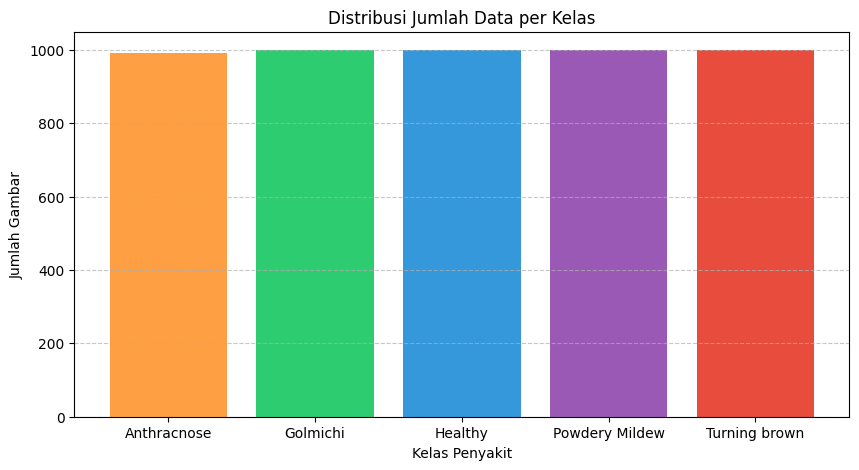

,Kelas,Jumlah Gambar
0,Anthracnose,993
1,Golmichi,1000
2,Healthy,1000
3,Powdery Mildew,1000
4,Turning brown,1000


In [3]:
# Ambil list nama kelas (sub-folder)
classes = sorted([d.name for d in DATA_DIR.iterdir() if d.is_dir()])
print(f"Ditemukan {len(classes)} kelas: {classes}")

# Hitung jumlah gambar per kelas
class_counts = {}
for c in classes:
    count = len(list((DATA_DIR / c).glob('*'))) # Hitung semua file
    class_counts[c] = count

# Buat DataFrame agar rapi
df_dist = pd.DataFrame(list(class_counts.items()), columns=['Kelas', 'Jumlah Gambar'])

# Visualisasi Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(df_dist['Kelas'], df_dist['Jumlah Gambar'], color=['#FF9F43', '#2ECC71', '#3498DB', '#9B59B6', '#E74C3C'])
plt.title('Distribusi Jumlah Data per Kelas')
plt.xlabel('Kelas Penyakit')
plt.ylabel('Jumlah Gambar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(df_dist)

## 2. Visualisasi Sampel Gambar

Menampilkan sampel gambar dari setiap kelas...


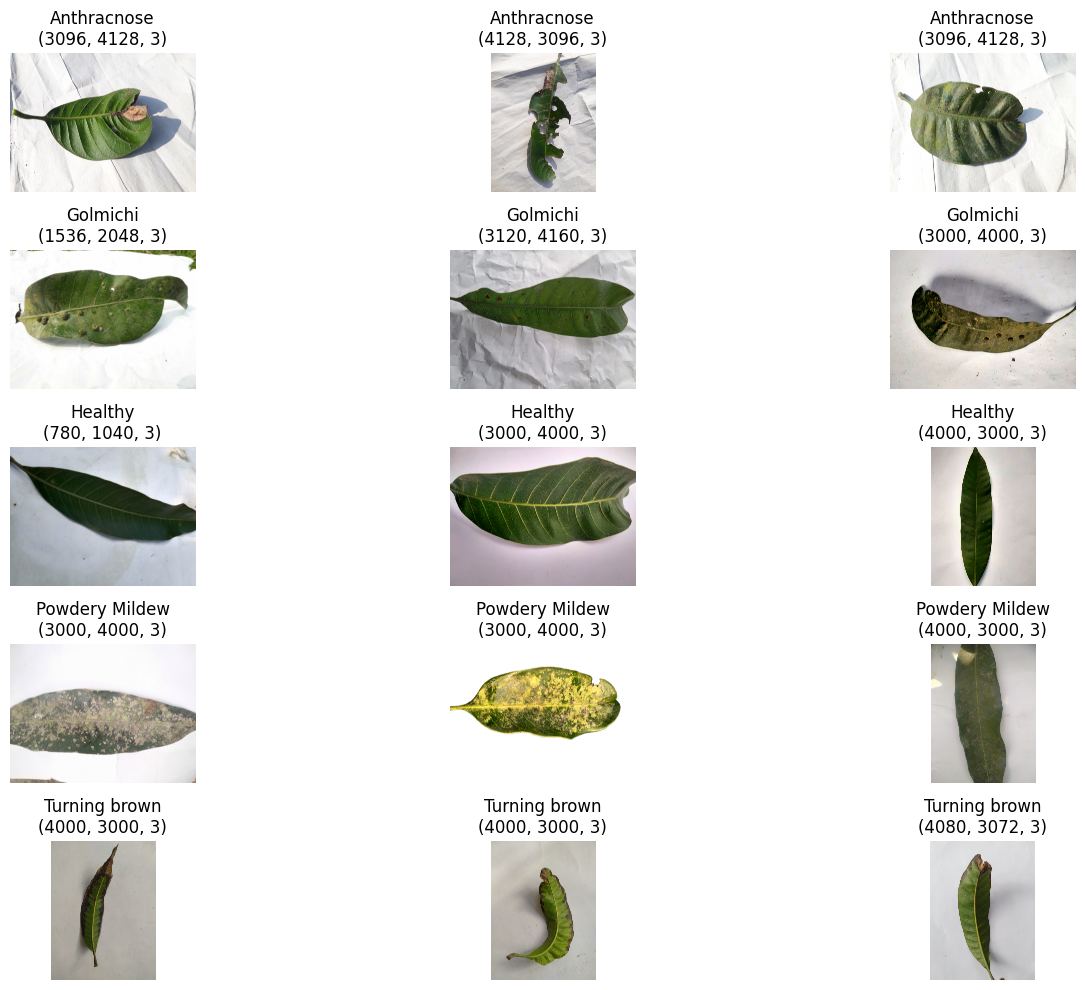

In [4]:
def show_samples(data_path, n_images=3):
    classes = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
    
    plt.figure(figsize=(15, 10))
    i = 1
    
    for c in classes:
        class_folder = data_path / c
        images = list(class_folder.glob('*'))[:n_images] # Ambil 3 gambar pertama
        
        for img_path in images:
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR ke RGB
            
            plt.subplot(len(classes), n_images, i)
            plt.imshow(img)
            plt.title(f"{c}\n{img.shape}") # Tampilkan nama kelas & resolusi
            plt.axis('off')
            i += 1
            
    plt.tight_layout()
    plt.show()

print("Menampilkan sampel gambar dari setiap kelas...")
show_samples(DATA_DIR)